# Introduction 

In [128]:
name = "Saeedeh Heydarian" 
telegram_id =  "saEdeHe" 
print("your name:", name)
print("your telegram id:", telegram_id)

your name: Saeedeh Heydarian
your telegram id: saEdeHe


### **In this project we are going to explore the stats of Olympic games' athletes. A dataset is provided which includes the atheletes names along with their weights, heights, ages and nationalities. Their corresponding athletic field with their medal has been provided as well.**

# Importing the necessary packages 

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
        # Loading the given dataset 
#======================================================
#Add all necessary packages here
#======================================================

# Loading the given dataset 

In [130]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\Data Science\project\dataset_olympics.csv', index_col=0)
df.shape

(70000, 14)

# Data preprocessing


In [131]:
df['Age'].isnull().sum()

2732

### Since the age is important in our analysis, we need to remove all records with NaN age. Also, the athletes without a medal must also have a new category named "none". 


In [132]:
df=df.dropna(subset=['Age'])

In [133]:
df["Medal"].fillna("none" , inplace=True)

In [134]:
df.Medal.value_counts()

none      57763
Gold       3260
Bronze     3137
Silver     3108
Name: Medal, dtype: int64

# Simple as it can be! 

### Here we want to calculate some simple statistics like mean and std for main features.

In [135]:
mean_age = df["Age"].mean()
mean_height = df["Height"].mean()
mean_weight = df["Weight"].mean()

std_age = df["Age"].std()
std_height = df["Height"].std()
std_weight = df["Weight"].std()

min_age = df["Age"].min()
min_height = df["Height"].min()
min_weight = df["Weight"].min()

max_age = df["Age"].max()
max_height = df["Height"].max()
max_weight = df["Weight"].max()

### Create two histograms to visualize the distribution of athlete ages seperated based on their sex

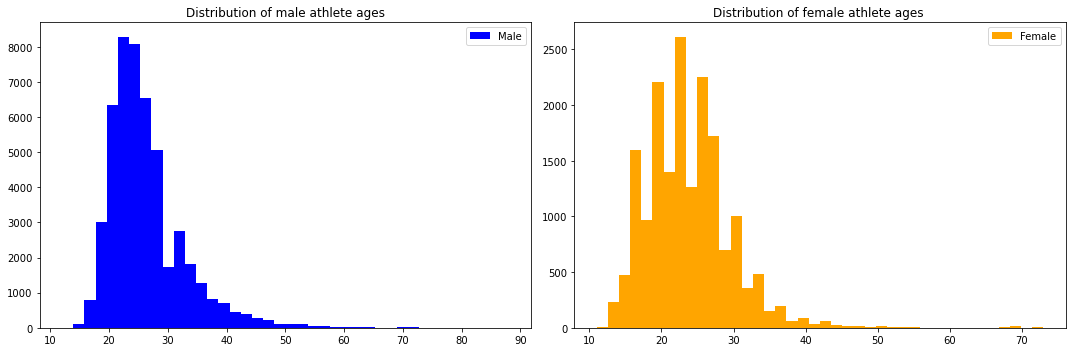

In [136]:
male_ages = df[df['Sex'] == 'M']['Age']
femal_ages = df[df['Sex'] == 'F']['Age']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) 
axes[0].hist(male_ages, bins=40, label='Male' , color="blue")
axes[0].set_title('Distribution of male athlete ages')
axes[0].legend()
axes[1].hist(femal_ages, bins=40, label='Female' , color="orange" )
axes[1].set_title('Distribution of female athlete ages ')
axes[1].legend()
plt.tight_layout()
plt.show()


#### Are women athletes more aged than men on average? Which age group appears most in the Olympics?

men athletes more aged than women on average.
18-28 age group appears most in the Olympics.


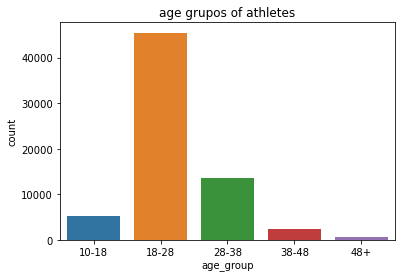

In [137]:
male_ages = df[df['Sex'] == 'M']['Age'].mean()
femal_ages = df[df['Sex'] == 'F']['Age'].mean()
if male_ages > femal_ages:
    print("men athletes more aged than women on average.")
else:
    print("women athletes more aged than men on average.")

    
df["age_group"]=pd.cut(df["Age"] , bins=[10, 18 , 28 , 38 , 48 , 70 ] , labels=["10-18" , "18-28", "28-38" , "38-48", "48+" ])
sns.countplot(x="age_group" , data=df)
plt.title("age grupos of athletes")
print("18-28 age group appears most in the Olympics.")

### What are the top 10 countries with more athlete appearance in the Olympics across all time? Create a Pie chart.

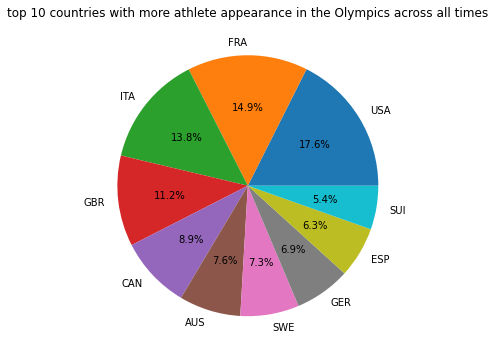

In [138]:
plt.figure(figsize=(8, 6))

labels = ["USA", "FRA", "ITA", "GBR", "CAN", "AUS", "SWE", "GER", "ESP", "SUI"]
sizes = []
for i in range(0 , 10):
    sizes.append(int(df.NOC.value_counts()[i]))
    
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('top 10 countries with more athlete appearance in the Olympics across all times')
plt.show()

###  Now we want to consider amother feature simultaenously. What are the top 10 medal-winning countries across all time? (You can apply coefficients to distinguish gold, silver and bronze medals)

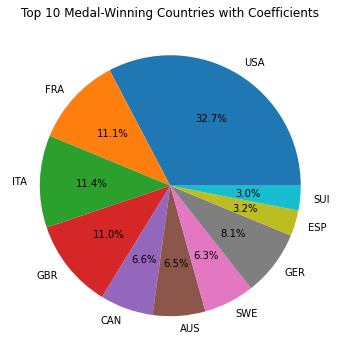

In [140]:
gold_medals=[]
silver_medals=[]
bronze_medals=[]

countries = df.NOC.value_counts()[:10].index.to_list()
for contry in countries:
    gold_medals.append(len(df[(df["NOC"]==contry) & (df["Medal"]=="Gold")]))
    silver_medals.append(len(df[(df["NOC"]==contry) & (df["Medal"]=="Silver")]))
    bronze_medals.append(len(df[(df["NOC"]==contry) & (df["Medal"]=="Bronze")]))

gold_coefficient = 3
silver_coefficient = 2
bronze_coefficient = 1

weighted_medal_counts = [
    (gold * gold_coefficient + silver * silver_coefficient + bronze * bronze_coefficient)
    for gold, silver, bronze in zip(gold_medals, silver_medals, bronze_medals)
]

labels = countries
sizes = [weighted_count for weighted_count in weighted_medal_counts]

plt.figure(figsize=(8, 6))
plt.pie(sizes[:10], labels=labels, autopct='%1.1f%%')
plt.title('Top 10 Medal-Winning Countries with Coefficients')
plt.show()


### Once more the histograms! Create a histrogram chart representing the age disributions but this time for medal-winning athletes only.

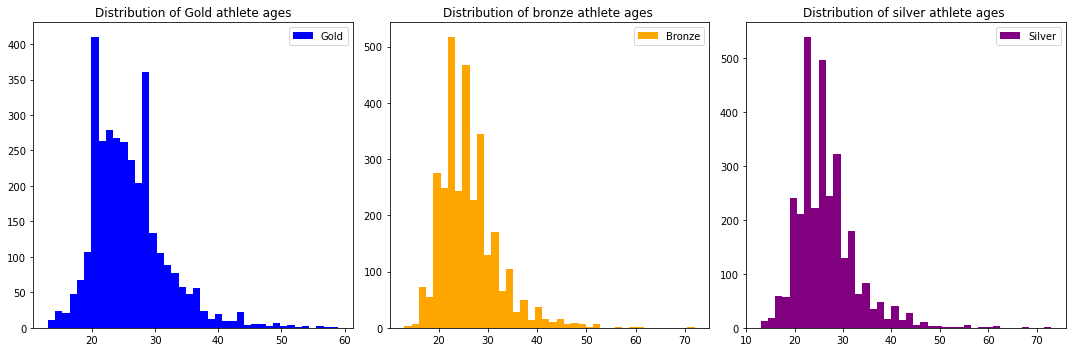

In [141]:
go_ages = df[df['Medal'] == 'Gold']['Age']
br_ages = df[df['Medal'] == 'Bronze']['Age']
si_ages = df[df['Medal'] == 'Silver']['Age']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) 
axes[0].hist(go_ages, bins=40, label='Gold' , color="blue")
axes[0].set_title('Distribution of Gold athlete ages')
axes[0].legend()
axes[1].hist(br_ages, bins=40, label='Bronze' , color="orange" )
axes[1].set_title('Distribution of bronze athlete ages ')
axes[1].legend()
axes[2].hist(si_ages, bins=40, label='Silver' , color="purple" )
axes[2].set_title('Distribution of silver athlete ages ')
axes[2].legend()
plt.tight_layout()
plt.show()

### Is there any correlation between winning a medal and the age? You need to prepare the data furthermore! For example, take 1 for athletes with a medal and 0 for those without any. Calculate the correleation between these two features!

In [142]:
df["Medal"]=df["Medal"].map({"Gold":1 , "Silver":1 , "Bronze":1 , "none":0})

<AxesSubplot:>

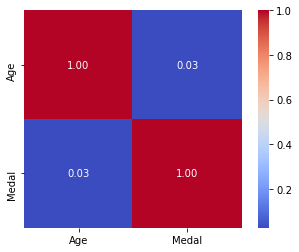

In [143]:
correlation = df[["Age", "Medal"]].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)

### In the last part we are going to introduce some hypotheses of our own about the data! Feel free to try out any statistical test that you deem appropriate and analyze our hypothses! 

## Hypothesis 1: Men athletes are more aged than women in general

In [144]:
male_ages_count = df[df['Sex'] == 'M']['Age']
female_ages_count=df[df['Sex'] == 'F']['Age']

In [145]:
t_statistic, p_value = stats.ttest_ind(male_ages_count, female_ages_count)

print(f"t_statistics:{t_statistic}")
print(f"p_value:{p_value}")


threshold=0.05
if p_value < threshold:
    print("There is evidence that men athletes are more aged than women in general.")
else:
    print("There is no significant difference in the ages between male and female athletes.")

t_statistics:45.91196547085584
p_value:0.0
There is evidence that men athletes are more aged than women in general.


## Hypothesis 2: African countries win more medals than others

In [146]:
df_=pd.read_csv(r"C:\Users\Administrator\Desktop\Data Science\project\African_NOC.csv")
list_african=df_["NOC"].tolist()
df["african"] = df["NOC"].isin(list_african).astype(int)

In [147]:
pearsonr, p_value = stats.pearsonr(df["african"], df["Medal"])
threshold=0.05
if p_value < threshold:
    print("There is a significant Pearson correlation.")
else:
    print("There is no significant Pearson correlation.")

There is a significant Pearson correlation.


## Hypothesis 3: The average age of Olympic atheles has decreased over the decades

In [148]:
df['Decade'] = (df['Year'] // 10) * 10 
decades=df["Decade"].value_counts()
decades_sorted = decades.sort_index(ascending=True)

In [149]:
anova_results = []
for decade in decades_sorted:
    group = df[df['Decade'] == decade]["Age"]
    anova_results.append(group)

In [150]:
f_oneway , pv=stats.f_oneway(*anova_results)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3680: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


In [151]:
threshold = 0.05  
if p_value < threshold:
    print("Reject the null hypothesis: The average age of Olympic atheles has increased over the decades.")
else:
    print("Fail to reject the null hypothesis: The average age of Olympic atheles has decreased over the decades.")

Reject the null hypothesis: The average age of Olympic atheles has increased over the decades.
